Этот ноутбук не рекомендуется к изучению, т.к. это буквально черновик =3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel("ecology.xlsx")
df.head(3)

,id,a4a,a6a,a2,a0,b1,b5,b7a,d1a1x,g1a,...,BMGc23i,BMGc23j,BMGc24,BMGc25,BMGc27,BMGd6,BMGd7,BMGe1,BMGe2,BMGe2u
0,22,Готовые Металлические Изделия,Малый,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2007,Нет,Производство Готовых Строительных Металлически...,0,...,Да,Нет,Модернизация машин и оборудования,Да,NaN,Нет,Нет,100000,20000,Литры
1,29,Машины и оборудование,Крупный,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2002,Нет,Производство Насосов И Компрессоров,0,...,Нет,Нет,Модернизация машин и оборудования,Нет,Не является приоритетом по сравнению с другими...,Нет,Нет,160000,18500,Литры
2,34,Другое Производство,Средний,Центральный Федеральный округ,Производство,Акционерная компания с неторгуемыми акциями ил...,2005,Нет,"Производство Алюминиевых И Медных Проводов, Си...",100,...,Да,Не знаю,NaN,Нет,Нехватка финансовых ресурсов,Нет,Нет,Не знаю,Не знаю,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1323 non-null   int64 
 1   a4a                  1323 non-null   object
 2   a6a                  1323 non-null   object
 3   a2                   1323 non-null   object
 4   a0                   1323 non-null   object
 5   b1                   1323 non-null   object
 6   b5                   1323 non-null   object
 7   b7a                  1323 non-null   object
 8   d1a1x                1323 non-null   object
 9   g1a                  1323 non-null   object
 10  BMj4c                1323 non-null   object
 11  j30_environment_pos  1323 non-null   int64 
 12  BMj5                 1323 non-null   object
 13  n2a                  1323 non-null   object
 14  n2e                  889 non-null    object
 15  n2b                  1323 non-null   object
 16  n2f   

In [5]:
cols = {  # словарь численных переменных, в которых есть (или нет) несколько строковых значений, например "не знаю"
    "g1a": ['не знаю', 'не применимо']
}

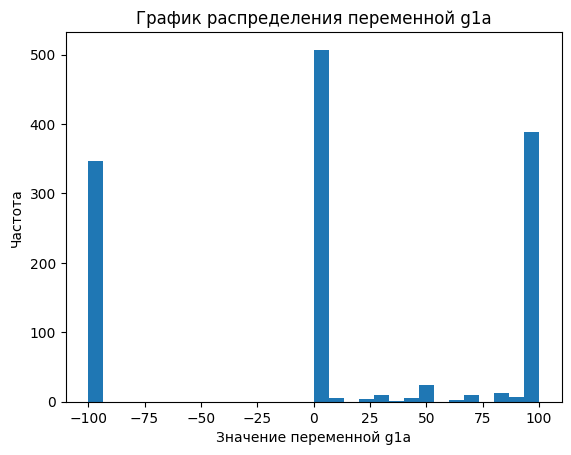

In [6]:
for col in cols.keys():
    """
    
    """
    exceptions = cols[col]
    plt.hist(df['g1a'].apply(lambda x: (-100 if x.lower() in exceptions else int(x))), bins=30)  # bins - количество интервалов
    plt.xlabel(f'Значение переменной {col}')
    plt.ylabel('Частота')
    plt.title(f'График распределения переменной {col}')
    plt.show()

пишу функцию которая будет автоматом создавать тот список cols

False

In [7]:
def get_dict_of_cols(df: pd.DataFrame, n=2):
    """
    returns a dict like: {column: [str_value, str_value]} where the str_value is one of the few string values in the column
    df is your main pandas dataframe
    n is the maximum allowed number of string values per column
    len(return[column]) <= n
    """
    result = {}
    columns_in_df = df.columns
    for column in columns_in_df:
        str_count, strs, digit_count = 0, [], 0
        values = df[column].value_counts().keys()
        for val in values:
            if str(val).isdigit():
                digit_count += 1
            else:
                str_count += 1
                strs.append(val)
            if str_count > n:
                continue
        if digit_count == 0:
            continue
        result[column] = strs
    return result

In [8]:
cols = get_dict_of_cols(df)
cols

{'id': [],
 'b5': ['Не знаю'],
 'g1a': ['Не применимо', 'Не знаю'],
 'j30_environment_pos': [],
 'n2a': ['Не знаю'],
 'n2e': ['Не знаю'],
 'n2b': ['Не знаю'],
 'n2f': ['Не знаю'],
 'n2i': ['Не знаю'],
 'n2p': ['Не знаю'],
 'BMGe1': ['Не знаю'],
 'BMGe2': ['Не знаю']}

In [78]:
def print_distr(cols: dict, figsize: tuple[int, int] = (30, 30), bins: int = 100) -> tuple[bool, str]:
    try:
        _, axes = plt.subplots((len(cols.keys()) // 2) + (1 if len(cols.keys()) % 2 > 0 else 0), 2, figsize=figsize)  # не читайте, не надо, это просто работает, ок?
        i, j, max_i = 0, 0, (len(cols.keys()) // 2) + (1 if len(cols.keys()) % 2 > 0 else 0)
        for col in cols.keys():
            exceptions = cols[col]
            col_of_nums = df[col].apply(lambda x: (-1000 if (x in exceptions or x != x) else float(x)))  # x != x only when x is NaN
            axes[i, j].hist(col_of_nums, bins=bins)
            axes[i, j].set_xlabel(f'Значение переменной {col}')
            axes[i, j].set_ylabel('Частота')
            axes[i, j].set_title(f'График распределения переменной {col}')
            # axes[i, j].set_xticks(range())
            # axes[i, j].set_xlim(min(-1000, col_of_nums.min()), col_of_nums.max())
            # axes[i, j].set_ylim(0, 1500)
            i += 1
            if i == max_i:
                j += 1
                i = 0
        plt.tight_layout()
        plt.show()
    except Exception as ex:
        return False, str(ex)
    return True, ""

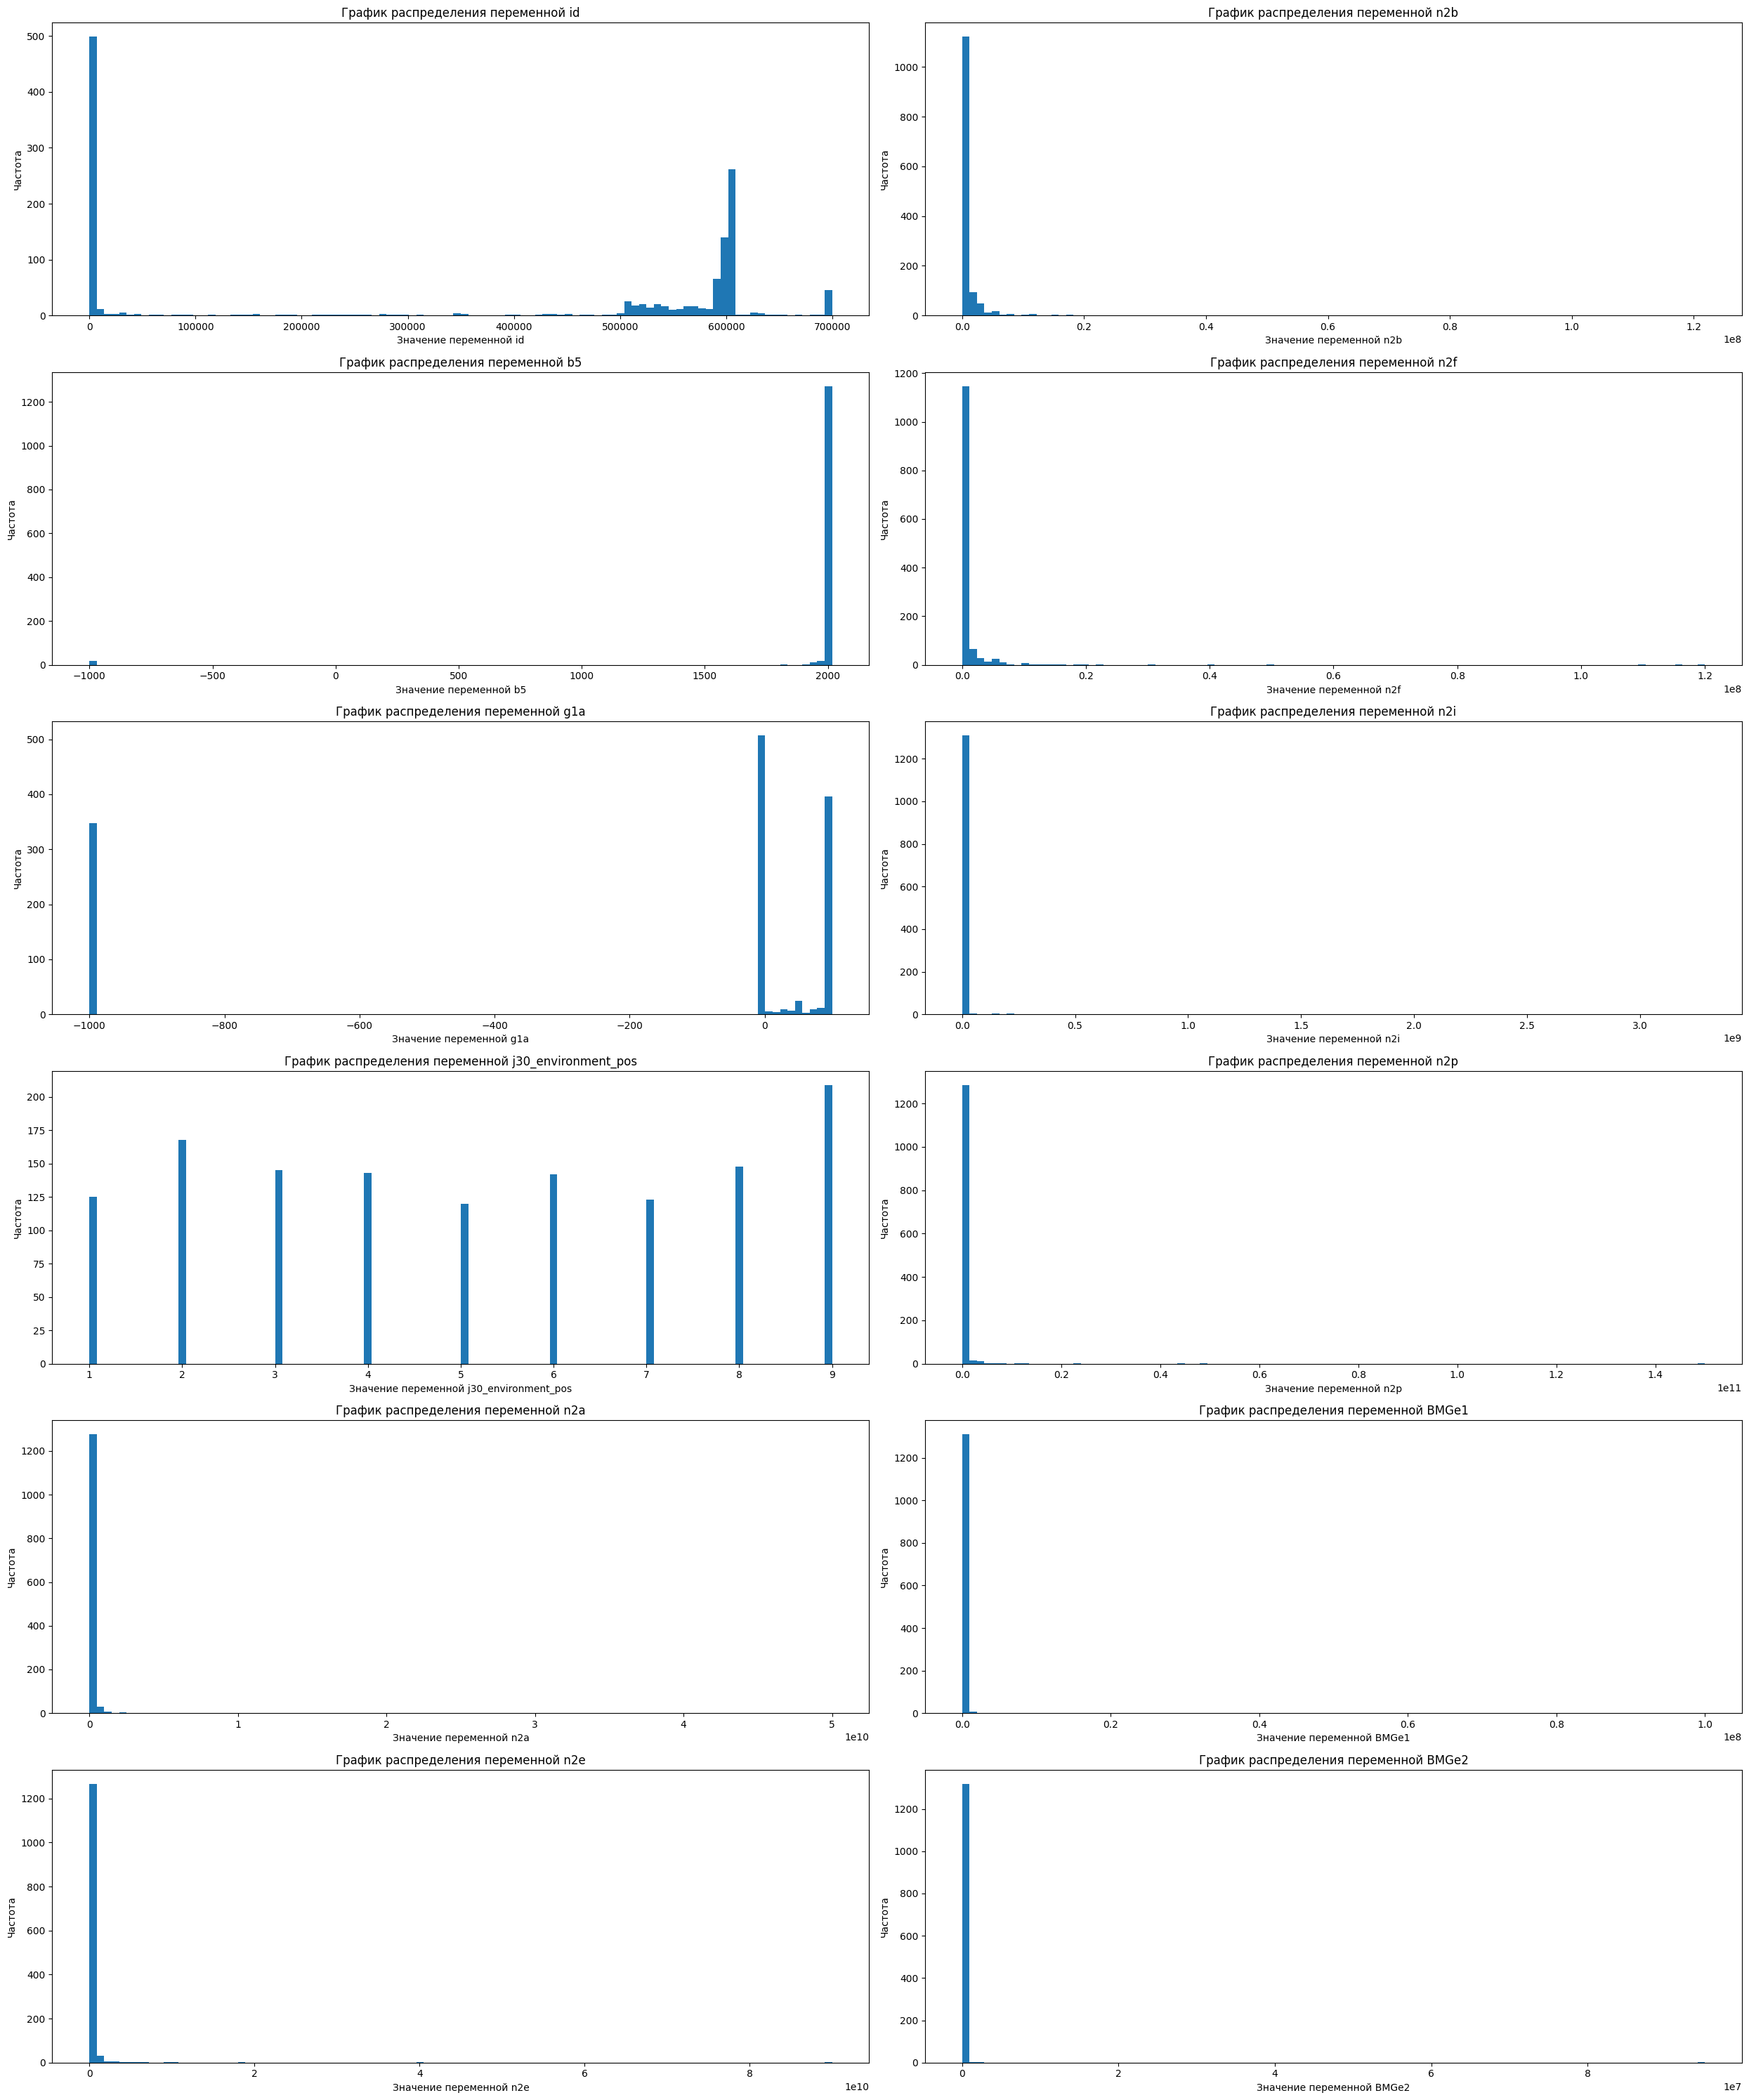

(True, '')

In [79]:
print_distr(cols, (25, 30))

In [46]:
cols

{'id': [],
 'b5': ['Не знаю'],
 'g1a': ['Не применимо', 'Не знаю'],
 'j30_environment_pos': [],
 'n2a': ['Не знаю'],
 'n2e': ['Не знаю'],
 'n2b': ['Не знаю'],
 'n2f': ['Не знаю'],
 'n2i': ['Не знаю'],
 'n2p': ['Не знаю'],
 'BMGe1': ['Не знаю'],
 'BMGe2': ['Не знаю']}

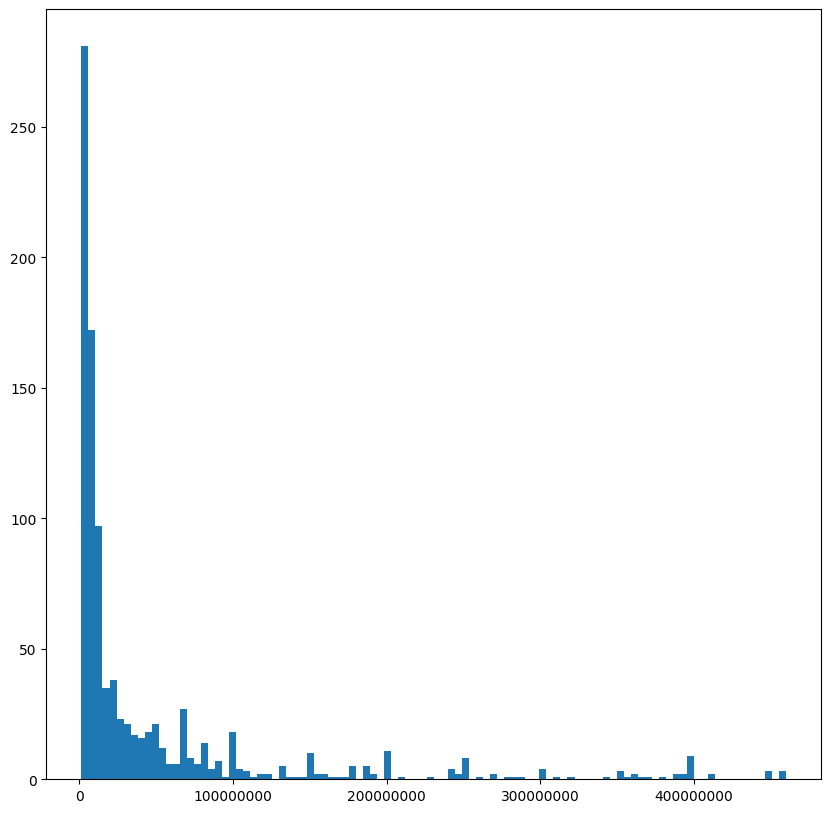

In [88]:
q95 = df[df['n2a'] != "Не знаю"]['n2a'].astype(float).quantile(0.95)
q05 = df[df['n2a'] != "Не знаю"]['n2a'].astype(float).quantile(0.05)
df[df['n2a'] != "Не знаю"]['n2a'].astype(float).apply(lambda x: x if q05 <= x <= q95 else float('nan')).dropna()
plt.figure(figsize=(10, 10))
plt.hist(df[df['n2a'] != "Не знаю"]['n2a'].astype(float).apply(lambda x: x if q05 <= x <= q95 else float('nan')).dropna(), bins = 100)
plt.gca().ticklabel_format(axis='x', style='plain')
plt.show()


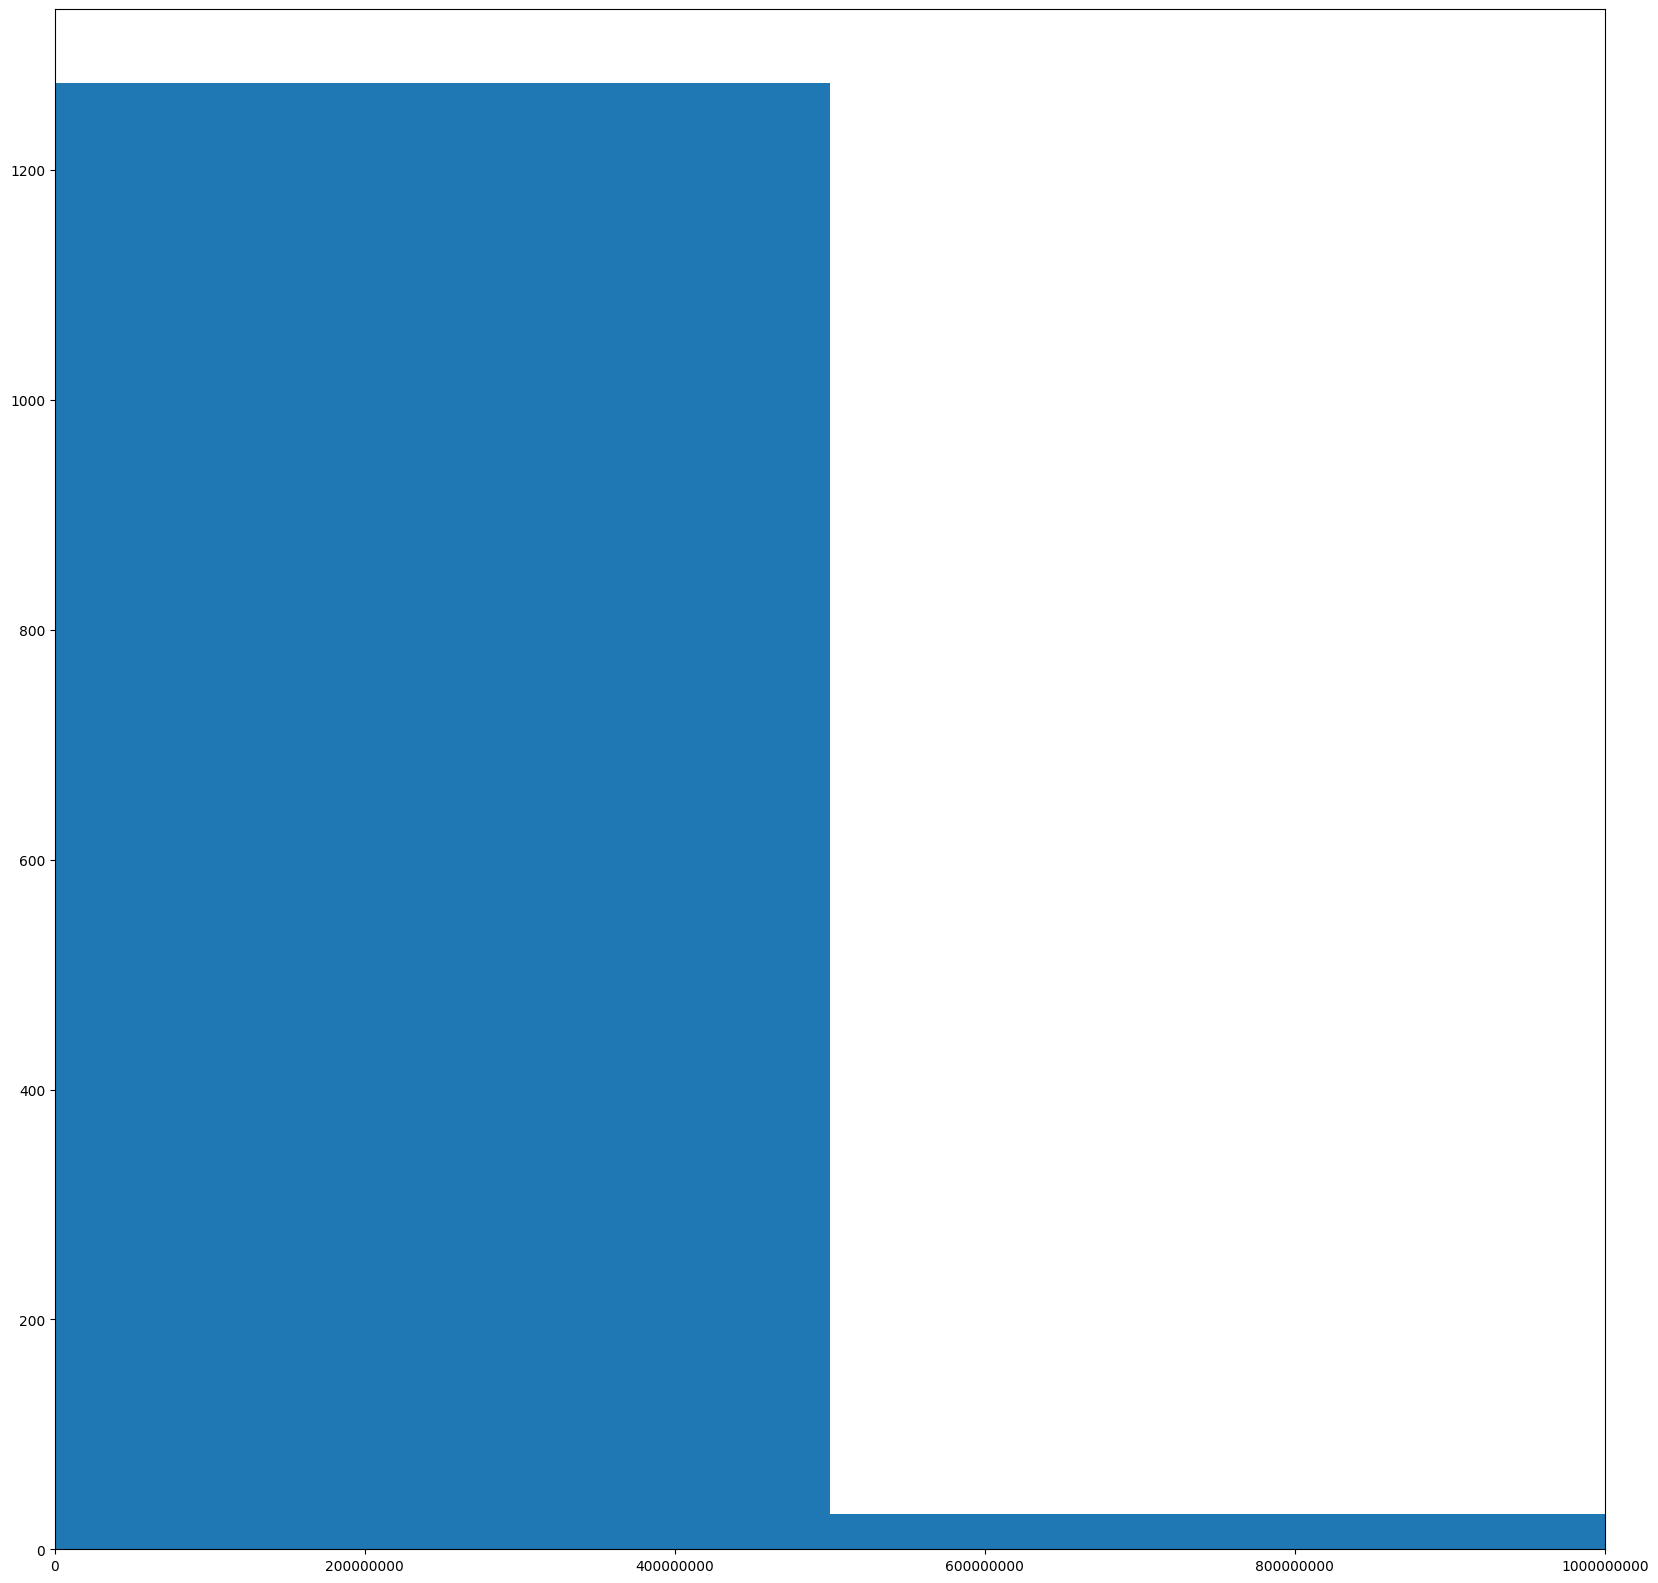

In [86]:
col_of_nums = df["n2a"].apply(lambda x: (-1000 if (x in exceptions or x != x) else float(x)))
plt.figure(figsize=(20, 20))
plt.hist(col_of_nums, bins = 100)
plt.gca().ticklabel_format(axis='x', style='plain')
plt.xlim(-10000, 1000000000)
plt.show()